In [1]:
%matplotlib inline

# Example plot for LFPy: Single-synapse contribution to the LFP

Copyright (C) 2017 Computational Neuroscience Group, NMBU.

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

In [2]:
import LFPy
import numpy as np
import matplotlib.pyplot as plt

## Main script, set parameters and create cell, synapse and electrode objects:

In [3]:
# Define cell parameters
cell_parameters = {          # various cell parameters,
    'morphology' : 'morphologies/L5_Mainen96_LFPy.hoc', # Mainen&Sejnowski, 1996
    'cm' : 1.0,         # membrane capacitance
    'Ra' : 150.,        # axial resistance
    'v_init' : -65.,    # initial crossmembrane potential
    'passive' : True,   # turn on passive mechanism for all sections
    'passive_parameters' : {'g_pas' : 1./30000, 'e_pas' : -65}, # passive params
    'nsegs_method' : 'lambda_f', # lambda_f method
    'lambda_f' : 100.,  # lambda_f critical frequency
    'dt' : 2.**-3,      # simulation time step size
    'tstart' : 0.,      # start time of simulation, recorders start at t=0
    'tstop' : 100.,     # stop simulation at 200 ms. These can be overridden
                        # by setting these arguments in cell.simulation()
}

# Create cell
cell = LFPy.Cell(**cell_parameters)

# Define synapse parameters
synapse_parameters = {
    'idx' : cell.get_closest_idx(x=0., y=0., z=900.),
    'e' : 0.,                   # reversal potential
    'syntype' : 'ExpSyn',       # synapse type
    'tau' : 10.,                # syn. time constant
    'weight' : .001,            # syn. weight
    'record_current' : True,
}

# Create synapse and set time of synaptic input
synapse = LFPy.Synapse(cell, **synapse_parameters)
synapse.set_spike_times(np.array([20.]))


# Create a grid of measurement locations, in (mum)
X, Z = np.mgrid[-500:501:20, -400:1201:40]
Y = np.zeros(X.shape)

# Define electrode parameters
electrode_parameters = {
    'sigma' : 0.3,      # extracellular conductivity
    'x' : X.flatten(),  # electrode requires 1d vector of positions
    'y' : Y.flatten(),
    'z' : Z.flatten()
}

# Create electrode object
electrode = LFPy.RecExtElectrode(**electrode_parameters)

# Run simulation, electrode object argument in cell.simulate
cell.simulate(electrode=electrode)

## Plot simulation output:

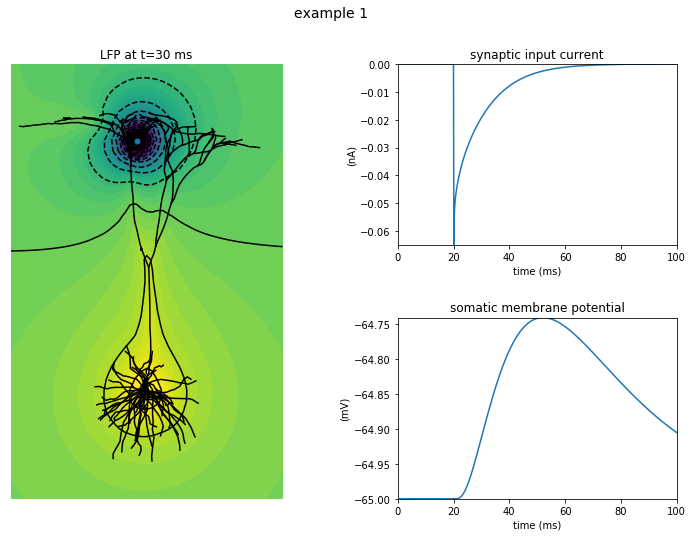

In [4]:
from example_suppl import plot_ex1
fig = plot_ex1(cell, electrode, X, Y, Z)
# Optionally save figure (uncomment the line below)
# fig.savefig('LFPy-example-5.pdf', dpi=300)